# Importing Retail Sales Dataset

In [23]:
import pandas as pd
df = pd.read_csv(r'\Users\User\Downloads\retail_sales_dataset.csv')

In [24]:
%whos
df.head()

Variable        Type         Data/Info
--------------------------------------
df              DataFrame         Transaction ID      <...>\n[1000 rows x 9 columns]
monthly_sales   Series       Date\n2023-01-31    35450<...>otal Amount, dtype: int64
pd              module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
plt             module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns             module       <module 'seaborn' from 'c<...>s\\seaborn\\__init__.py'>


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Converting Date to Datetime

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


# Mean, Median, standard Deviation for Total amount, Price Per Unit and Quantity

In [26]:
df.describe()
df.groupby('Product Category')['Total Amount'].agg(['mean', 'median', 'std'])


,mean,median,std
Product Category,,,
Beauty,467.475570,120.0,563.612788
Clothing,443.247863,120.0,550.695917
Electronics,458.786550,150.0,567.540150


# Time Series Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_6428\2578724057.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()


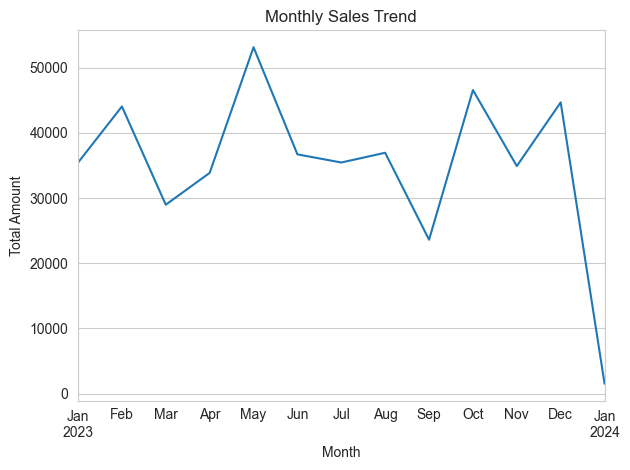

In [27]:
df.set_index('Date', inplace=True)
monthly_sales = df['Total Amount'].resample('M').sum()

import matplotlib.pyplot as plt

monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


# Customer and Product Analysis

<Axes: xlabel='Gender'>

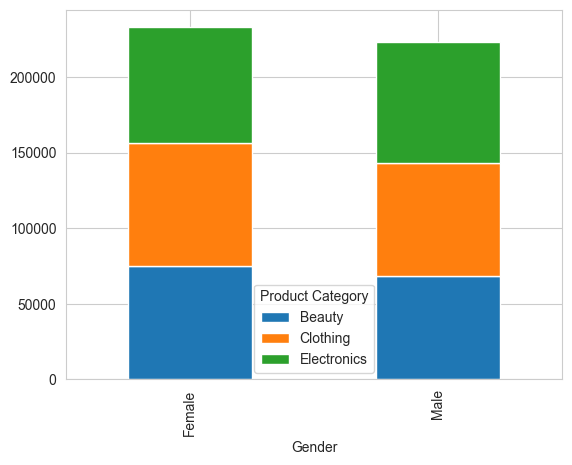

In [28]:
df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack().plot(kind='bar', stacked=True)

# Sales By Product Category

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_6428\713202003.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x = 'Product Category', y = 'Total Amount', estimator=sum, ci=None)


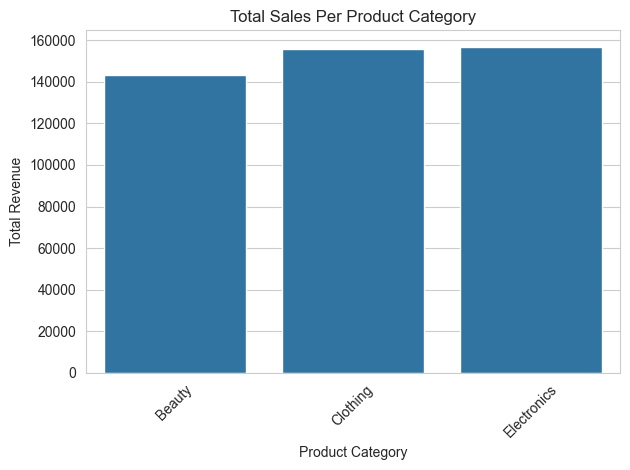

In [30]:
sns.barplot(data=df, x = 'Product Category', y = 'Total Amount', estimator=sum, ci=None)
plt.title('Total Sales Per Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Purchasing Behaviour By Gender

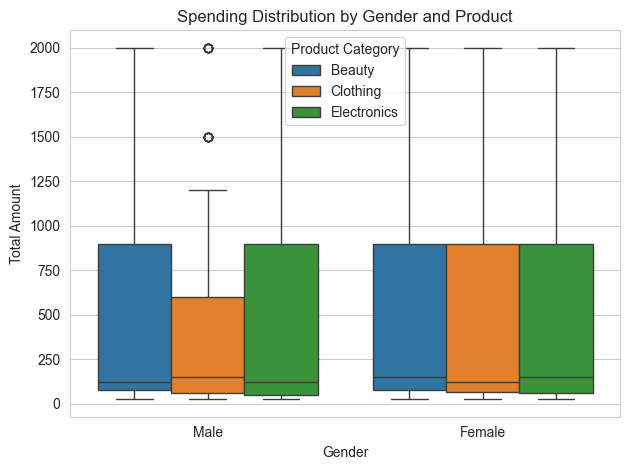

In [31]:
sns.boxplot(data=df, x='Gender', y='Total Amount', hue='Product Category')
plt.title('Spending Distribution by Gender and Product')
plt.tight_layout()
plt.show()


# Age Distribution of Customers

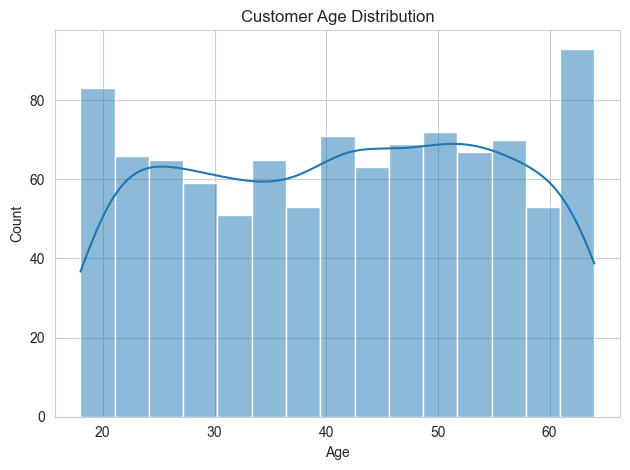

In [32]:
sns.histplot(data=df, x='Age', bins=15, kde=True)
plt.title('Customer Age Distribution')
plt.tight_layout()
plt.show()


# Heatmap of Average Quantity Purchased by Age and Category

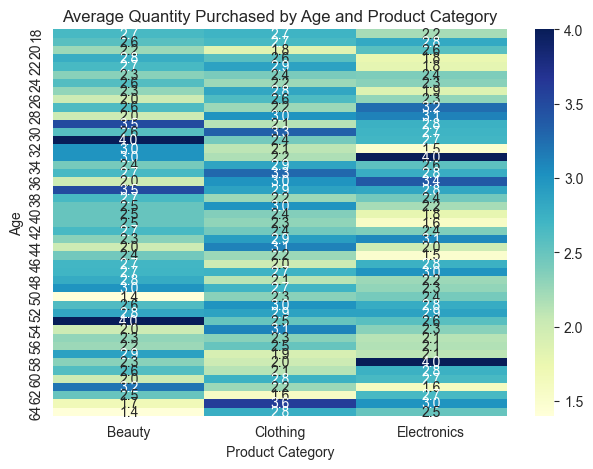

In [35]:
heatmap_data = df.pivot_table(index='Age', columns='Product Category', values='Quantity', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.title('Average Quantity Purchased by Age and Product Category')
plt.tight_layout()
plt.show()


In [34]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
